# <font color="blue"> Practice Lab: Neural Networks for Handwritten Digit Recognition, Binary </font>

## <font color='red'> Using Tensorflow </font>

In [1]:
#Importing Package
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

###  Problem Statement

In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment. 


### 2.2 Dataset

You will start by loading the dataset for this task. 
- The `loadData()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [2]:
#loading Data
def LoadData():
    
    '''
    Hear x.npy is the numpy array of images of hand written 1 and 0 where 400 cell represent the value of brightness 
    Hear y.npy is the numpy array of actual number corrseponding to images in xtrain  of hand written 1 and 0  
    '''
    
    x = np.load('./Materials_By_Deeplearning/data/x.npy')
    y = np.load('./Materials_By_Deeplearning/data/y.npy')
    print("Actual Size of data X_train is",x.shape)
    print("Actual Size of data y_train is",y.shape)
    x = x[0:1000]
    y = y[0:1000]
    print("Modified Size of data X_train is",x.shape)
    print("Modified Size of data y_train is",y.shape)
    return x,y
    
x_train,y_train = LoadData()

Actual Size of data X_train is (5000, 400)
Actual Size of data y_train is (5000, 1)
Modified Size of data X_train is (1000, 400)
Modified Size of data y_train is (1000, 1)


In [3]:
# let's print frist element of the x_train
print("frist element of the y_train\n",y_train[0])
print("frist element of the x_train\n",x_train[0])

frist element of the y_train
 [0]
frist element of the x_train
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.000000

####  Visualizing the Data

You will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

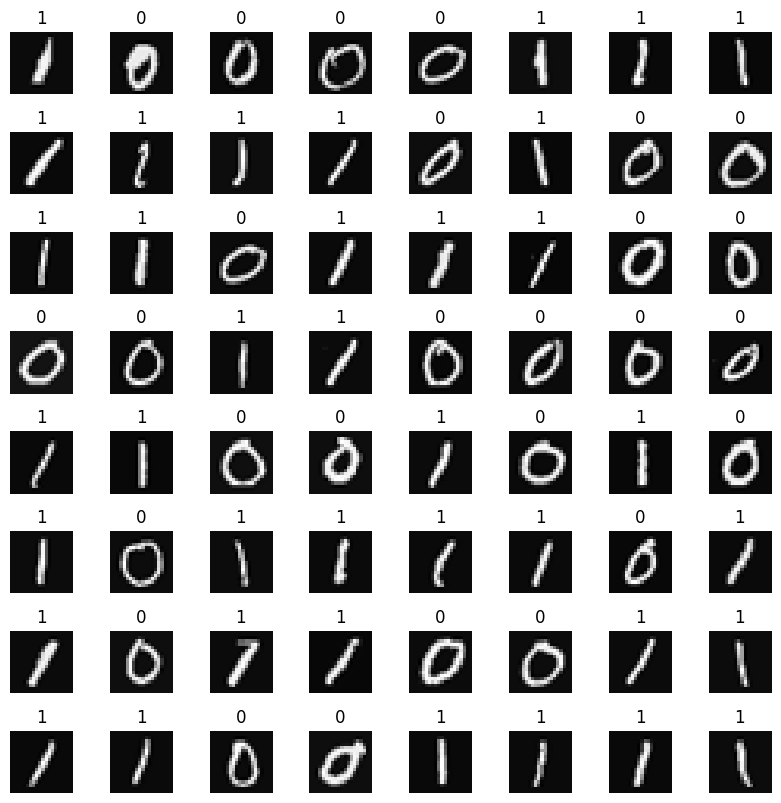

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = x_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((20,20)).T  #..T means transposition of the matrix
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs 
    
- The parameters have dimensions that are sized for a neural network with:
    - $25$ units in layer 1, 
    - $15$ units in layer 2 and 
    - $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               

In [5]:
#let's create model in this 
model = Sequential([
    
    tf.keras.Input(shape=(400,)),
    tf.keras.layers.Dense(units=25, activation = "sigmoid", name="Layer_1"),
    tf.keras.layers.Dense(units=15, activation = "sigmoid", name="Layer_2"),
    tf.keras.layers.Dense(units=1, activation = 'sigmoid', name='Layer_3')
    
],name="Handwritten_digit_classification")

model.summary()

Model: "Handwritten_digit_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 25)                10025     
                                                                 
 Layer_2 (Dense)             (None, 15)                390       
                                                                 
 Layer_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Examing the weight
w1,b1 = model.get_layer('Layer_1').get_weights()
w2,b2 = model.get_layer('Layer_2').get_weights()
w3,b3 = model.get_layer('Layer_3').get_weights()

print('Layer 1: ')
print(f'   w = {w1.shape}          b={b1.shape}')
print('\nLayer 2: ')
print(f'   w = {w2.shape}          b={b2.shape}')
print('\nLayer 3: ')
print(f'   w = {w3.shape}          b={b3.shape}')

Layer 1: 
   w = (400, 25)          b=(25,)

Layer 2: 
   w = (25, 15)          b=(15,)

Layer 3: 
   w = (15, 1)          b=(1,)


In [8]:
# Let's compile and train model 
model.compile(

    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(0.01)
)

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 1ms/step - loss: 9.5284e-04
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 6.3944e-04
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 1.3644e-04
Epoch 7/20
32/32 [==============================] - 0s 994us/step - loss: 1.1216e-04
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 1.0257e-04
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 9.4097e-05
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 8.6453e-05
Epoch 11/20
32/32 [==============================] - 0s 968us/step - loss: 7.9677e-05
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 7.3617e-05
Epoch 13/

In [11]:
prediction=[]
prediction.append(model.predict(x_train[0].reshape(1,400)))  # a zero
print(f" predicting a zero: {prediction[-1]}")
prediction.append(model.predict(x_train[500].reshape(1,400)))  # a one
print(f" predicting a one:  {prediction[-1]}")

1/1 [==============================] - 0s 16ms/step
 predicting a zero: [[5.0986302e-05]]
1/1 [==============================] - 0s 14ms/step
 predicting a one:  [[0.99997073]]


In [15]:
yhat = []
for i in range (len(prediction)):
    if prediction[i] >= 0.5:
        yhat.append(1) 
    else:
        yhat.append(0)
        
print(f"prediction after threshold:\n {yhat}")

prediction after threshold:
 [0, 1]


1/1 [==============================] - 0s 15ms/step


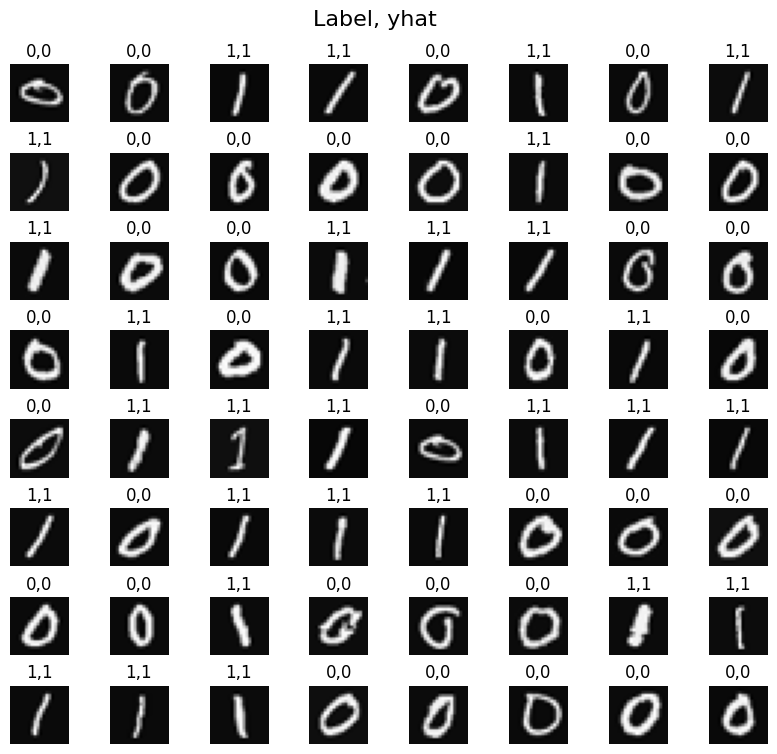

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(x_train[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

## <font color='red'>  NumPy Model Implementation (Forward Prop in NumPy) </font>

In [29]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def Dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    
    units = W.shape[1]
    a_out = np.zeros(units)
    
    for j in range (units):
        z = np.dot(W[:,j],a_in)+b[j]
        a_out[j] = g(z)
    
    return a_out

In [32]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = Dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

#ideal output must be 
# [0.54735762 0.57932425 0.61063923]

[0.54735762 0.57932425 0.61063923]


In [44]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = Dense(x,  W1, b1, sigmoid)
    a2 = Dense(a1, W2, b2, sigmoid)
    a3 = Dense(a2, W3, b3, sigmoid)
    return(a3)

In [45]:
#loading the trained parameters from tensoeflow model 
W1_tmp,b1_tmp = model.get_layer('Layer_1').get_weights()
W2_tmp,b2_tmp = model.get_layer('Layer_2').get_weights()
W3_tmp,b3_tmp = model.get_layer('Layer_3').get_weights()

In [46]:
# make predictions
prediction = my_sequential(x_train[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y_train[0,0])
prediction = my_sequential(x_train[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y_train[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


1/1 [==============================] - 0s 24ms/step


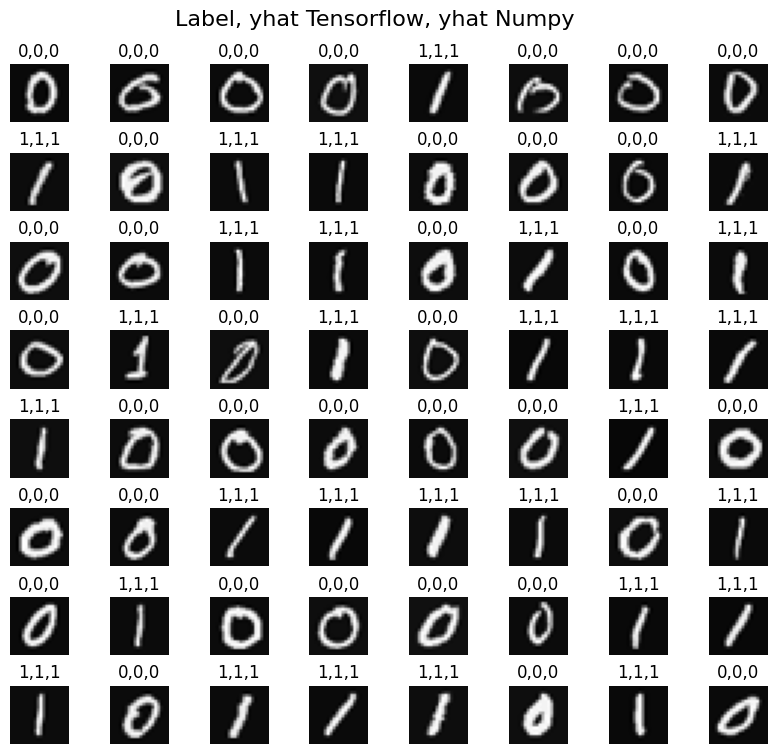

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(x_train[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(x_train[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

Hence by using any of the methord we are getting the same answer